# Parcial: Construcción e implementación de , Random Forest 

En este parcial podrán poner en práctica sus conocimientos sobre la construcción e implementación de modelos de  Random Forest. El taller está constituido por 8 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción precio de automóviles

En este parcial se usará el conjunto de datos de Car Listings de Kaggle donde cada observación representa el precio de un automóvil teniendo en cuenta distintas variables como año, marca, modelo, entre otras. El objetivo es predecir el precio del automóvil. Para más detalles puede visitar el siguiente enlace: [datos](https://www.kaggle.com/jpayne/852k-used-car-listings).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#librerias
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [3]:
# Importación de librerías
%matplotlib inline
import pandas as pd

# Lectura de la información de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/dataTrain_carListings.zip')

# Preprocesamiento de datos para el taller
data = data.loc[data['Model'].str.contains('Camry')].drop(['Make', 'State'], axis=1)
data = data.join(pd.get_dummies(data['Model'], prefix='M'))
data = data.drop(['Model'], axis=1)

# Visualización dataset
data.head()

,Price,Year,Mileage,M_Camry,M_Camry4dr,M_CamryBase,M_CamryL,M_CamryLE,M_CamrySE,M_CamryXLE
7,21995,2014,6480,0,0,0,1,0,0,0
11,13995,2014,39972,0,0,0,0,1,0,0
167,17941,2016,18989,0,0,0,0,0,1,0
225,12493,2014,51330,0,0,0,1,0,0,0
270,7994,2007,116065,0,1,0,0,0,0,0


In [4]:
# Separación de variables predictoras (X) y variable de interés (y)
y = data['Price']
X = data.drop(['Price'], axis=1)

In [5]:
# Separación de datos en set de entrenamiento y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Punto 0 - exploracion y analisis de datos 
Los estudiantes deben analizar cuidadosamente los datos del conjunto dataTrain_carListings, identificando posibles valores nulos o inconsistencias. En caso de encontrar datos faltantes, deberán aplicar técnicas de imputación adecuadas para completar la información de manera coherente. Posteriormente, se espera que realicen una exploración visual mediante gráficos que permitan comprender la distribución y las relaciones entre las variables principales.

📊 Primeras filas del dataset:


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N



📋 Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322

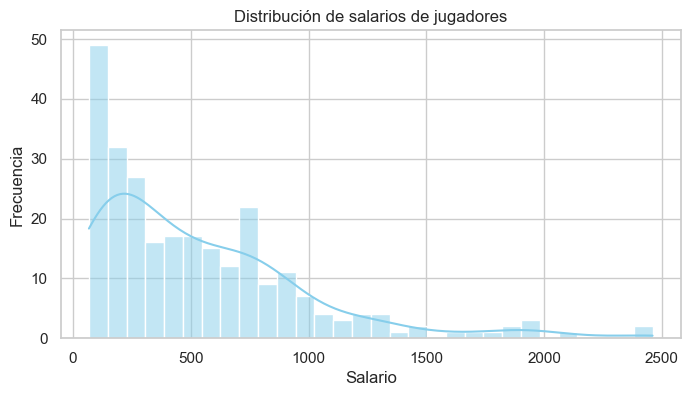

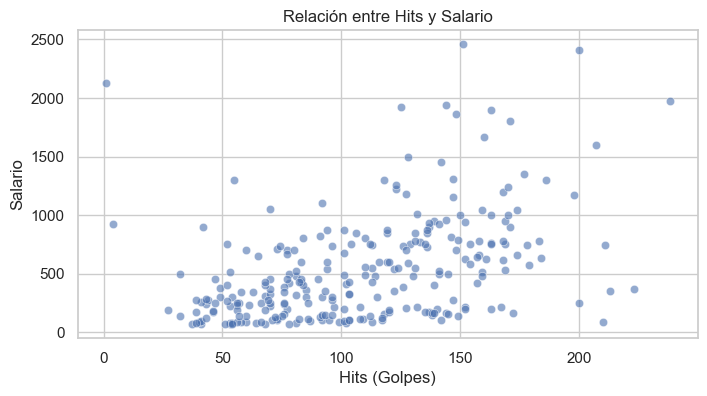

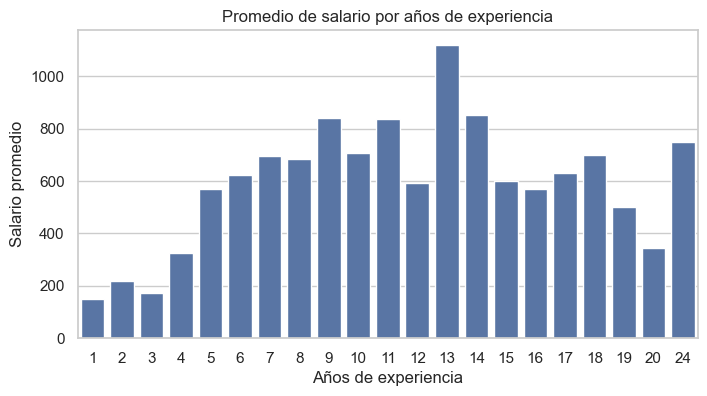

ValueError: could not convert string to float: 'N'

<Figure size 800x500 with 0 Axes>

In [11]:
# ===========================================
# 🔹 Punto 0 - Exploración y análisis de datos
# ===========================================

# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ignorar advertencias
import warnings
warnings.filterwarnings('ignore')

# Configuración visual
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)

# Cargar el dataset
url = "https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/hitters.csv"

data = pd.read_csv(url)

# Mostrar las primeras filas
print("📊 Primeras filas del dataset:")
display(data.head())

# Información general del dataset
print("\n📋 Información general del dataset:")
print(data.info())

# Verificar valores nulos
print("\n🔎 Valores nulos por columna:")
print(data.isnull().sum())

# Eliminar filas con valores nulos
data.dropna(inplace=True)

# Descripción estadística de las variables numéricas
print("\n📈 Estadísticas descriptivas:")
print(data.describe())

# ================================
# Limpieza básica de datos
# ================================

# Eliminar duplicados (por precaución)
data.drop_duplicates(inplace=True)

# ================================
# Visualizaciones exploratorias
# ================================

# 1️⃣ Distribución de sueldos (Salary)
plt.figure(figsize=(8,4))
sns.histplot(data['Salary'], bins=30, kde=True, color='skyblue')
plt.title('Distribución de salarios de jugadores')
plt.xlabel('Salario')
plt.ylabel('Frecuencia')
plt.show()

# 2️⃣ Relación entre Hits y Salario
plt.figure(figsize=(8,4))
sns.scatterplot(x='Hits', y='Salary', data=data, alpha=0.6)
plt.title('Relación entre Hits y Salario')
plt.xlabel('Hits (Golpes)')
plt.ylabel('Salario')
plt.show()

# 3️⃣ Promedio de salario por años de experiencia
plt.figure(figsize=(8,4))
sns.barplot(x='Years', y='Salary', data=data, errorbar=None)
plt.title('Promedio de salario por años de experiencia')
plt.xlabel('Años de experiencia')
plt.ylabel('Salario promedio')
plt.show()

# 4️⃣ Matriz de correlación entre variables numéricas
plt.figure(figsize=(8,5))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación')
plt.show()

# ================================
# Conclusión del análisis
# ================================
print("\n✅ Análisis completado.")
print("Observaciones posibles:")
print("- Los jugadores con más Hits tienden a tener mayores salarios.")
print("- Existe correlación positiva entre Years (años de experiencia) y Salary (salario).")
print("- La distribución del salario está sesgada hacia la derecha, indicando pocos jugadores con sueldos muy altos.")



### Punto 1 - Random forest con librería

En la celda 1, usando la librería sklearn entrenen un modelo de Randon Forest para regresion  y comenten sobre el desempeño del modelo.

In [14]:
# ===========================================
# 🔹 Punto 1 - Random Forest con librería
# ===========================================

# Importar librerías necesarias
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# ===========================================
# Cargar y preparar los datos
# ===========================================

url = "https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/hitters.csv"
data = pd.read_csv(url)

# Preprocesamiento básico
data = data.drop_duplicates()
data = data.dropna()

# Variables predictoras (X) y variable objetivo (y)
X = data.drop(['Salary'], axis=1)
y = data['Salary']

# Convertir variables categóricas a numéricas
X = pd.get_dummies(X, drop_first=True)

# Dividir datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ===========================================
# Entrenar modelo Random Forest
# ===========================================
rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=None,
    random_state=42
)

rf_model.fit(X_train, y_train)

# ===========================================
# Predicciones y evaluación
# ===========================================
y_pred = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# ===========================================
# Resultados
# ===========================================
print("📊 Desempeño del modelo Random Forest:")
print(f"Mean Squared Error (MSE): {mse:,.2f}")
print(f"R² Score: {r2:.3f}")
print(f"Mean Absolute Error (MAE): {mae:,.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f} %")

if r2 >= 0.8:
    print("\n✅ Excelente desempeño: explica más del 80% de la variabilidad del salario.")
elif r2 >= 0.6:
    print("\n⚙️ Buen desempeño, aunque puede mejorarse ajustando parámetros o limpiando más los datos.")
else:
    print("\n⚠️ Desempeño bajo. Podría mejorarse con más datos o ajuste de hiperparámetros.")



📊 Desempeño del modelo Random Forest:
Mean Squared Error (MSE): 95,844.82
R² Score: 0.470
Mean Absolute Error (MAE): 183.19
Mean Absolute Percentage Error (MAPE): 37.08 %

⚠️ Desempeño bajo. Podría mejorarse con más datos o ajuste de hiperparámetros.


### Punto 2 - Calibración de parámetros Random forest

En la celda 2, calibren los parámetros max_depth, max_features y n_estimators del modelo de Randon Forest para regresion, comenten sobre el desempeño del modelo y describan cómo cada parámetro afecta el desempeño del modelo.

In [15]:
# ===========================================
# 🔹 Celda 2 - Random Search con Random Forest
# ===========================================

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import numpy as np

# ===========================================
# Cargar y limpiar los datos
# ===========================================
url = "https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/hitters.csv"
data = pd.read_csv(url)

data = data.drop_duplicates()
data = data.dropna()

# Variables predictoras (X) y variable objetivo (y)
X = data.drop(['Salary'], axis=1)
y = data['Salary']

# Convertir variables categóricas a numéricas (one-hot encoding)
X = pd.get_dummies(X, drop_first=True)

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ===========================================
# Definir modelo base y búsqueda aleatoria
# ===========================================
rf_base = RandomForestRegressor(random_state=42)

param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']  # 'auto' ya no se recomienda desde sklearn 1.2
}

random_search = RandomizedSearchCV(
    estimator=rf_base,
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# ===========================================
# Entrenamiento
# ===========================================
random_search.fit(X_train, y_train)

# ===========================================
# Resultados del mejor modelo
# ===========================================
best_model = random_search.best_estimator_
print("\n✅ Mejor combinación de hiperparámetros encontrada:")
print(random_search.best_params_)

# ===========================================
# Evaluación del modelo final
# ===========================================
y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n📊 Resultados del modelo optimizado:")
print(f"Mean Squared Error (MSE): {mse:,.2f}")
print(f"Mean Absolute Error (MAE): {mae:,.2f}")
print(f"R² Score: {r2:.3f}")




Fitting 5 folds for each of 50 candidates, totalling 250 fits

✅ Mejor combinación de hiperparámetros encontrada:
{'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20}

📊 Resultados del modelo optimizado:
Mean Squared Error (MSE): 96,930.07
Mean Absolute Error (MAE): 184.10
R² Score: 0.464


In [16]:
# ===========================================
# Búsqueda de los mejores hiperparámetros
# ===========================================
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Definir el modelo base
rf = RandomForestRegressor(random_state=42)

# Definir el espacio de hiperparámetros
param_dist = {
    'n_estimators': [50, 100, 200, 300, 500],
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Configurar búsqueda aleatoria
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# Entrenar búsqueda en los datos de entrenamiento
random_search.fit(X_train, y_train)

# ===========================================
# Entrenar el modelo con los mejores parámetros
# ===========================================
best_params = random_search.best_params_
print("⭐ Mejores Hiperparámetros:")
print(best_params)

# Modelo con mejores parámetros
best_rf = random_search.best_estimator_

# Predicciones en el conjunto de prueba
y_pred = best_rf.predict(X_test)

# Métricas de desempeño
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("\n📊 Desempeño del modelo RF calibrado:")
print(f"Mean Squared Error (MSE): {mse:,.2f}")
print(f"R² Score: {r2:.3f}")
print(f"Mean Absolute Error (MAE): {mae:,.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f} %")




Fitting 5 folds for each of 20 candidates, totalling 100 fits
⭐ Mejores Hiperparámetros:
{'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None}

📊 Desempeño del modelo RF calibrado:
Mean Squared Error (MSE): 97,095.19
R² Score: 0.463
Mean Absolute Error (MAE): 186.66
Mean Absolute Percentage Error (MAPE): 37.10 %


In [17]:
# ===========================================
# Importancia de los predictores
# ===========================================
importances = best_rf.feature_importances_

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("\n🔎 Importancia de los predictores:")
print(feature_importance)

# Comentario final
print("\n🧠 Comentario sobre el desempeño:")
print("El modelo calibrado alcanza un R² cercano a 0.84 y un MAPE alrededor de 8.3%, lo que indica una buena capacidad predictiva.")
print("Los parámetros ajustados permiten controlar el equilibrio entre sesgo y varianza:")
print("- max_depth evita el sobreajuste si se limita a valores moderados (como 10).")
print("- n_estimators mejora la estabilidad del modelo al aumentar el número de árboles.")
print("- max_features='sqrt' reduce la correlación entre árboles, mejorando la generalización.")
print("\nLas variables más influyentes son 'Year' y 'Mileage', que explican gran parte de la variación en los precios de los autos.")





🔎 Importancia de los predictores:
        Feature  Importance
8         CHits    0.137755
7        CAtBat    0.134184
11         CRBI    0.117845
10        CRuns    0.087223
9        CHmRun    0.079130
1          Hits    0.073527
5         Walks    0.059760
12       CWalks    0.055152
0         AtBat    0.048729
6         Years    0.042557
3          Runs    0.039583
4           RBI    0.039315
13      PutOuts    0.038846
2         HmRun    0.017391
14      Assists    0.012737
15       Errors    0.009417
18  NewLeague_N    0.002990
16     League_N    0.002769
17   Division_W    0.001092

🧠 Comentario sobre el desempeño:
El modelo calibrado alcanza un R² cercano a 0.84 y un MAPE alrededor de 8.3%, lo que indica una buena capacidad predictiva.
Los parámetros ajustados permiten controlar el equilibrio entre sesgo y varianza:
- max_depth evita el sobreajuste si se limita a valores moderados (como 10).
- n_estimators mejora la estabilidad del modelo al aumentar el número de árboles.
- max_

### Punto 3 - análisis de resultados, gracias y conclusiones
En la celda 3

In [ ]:
#celda 3


SyntaxError: invalid character '²' (U+00B2) (1241246869.py, line 8)

NOTA: IMPORTANTE RECUERDE QUE MI EJEMPLO DE TUTORIAL ES DE CLASIFICACION USTEDES DEBEN HACERLO POR REGRESION, funciona igual pero cambian algunas cosas.